## Libraries

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, fbeta_score, make_scorer, average_precision_score
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## Exploring Data

In [ ]:
# load data
df = pd.read_csv("diabetic_data.csv")
admission_type_code = pd.read_csv("IDS_mapping.csv", nrows=8)
discharge_disposition_code = pd.read_csv("IDS_mapping.csv", skiprows=10, nrows=30)
admission_source_code = pd.read_csv("IDS_mapping.csv", skiprows=42)

In [ ]:
admission_type_code

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
discharge_disposition_code.to_csv("discharge_disposition_code.csv", index=False)
discharge_disposition_code

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


In [ ]:
admission_source_code.to_csv("admission_source_code.csv", index=False)
admission_source_code

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


In [ ]:
df.dtypes

,0
encounter_id,int64
patient_nbr,int64
race,object
gender,object
age,object
weight,object
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
time_in_hospital,int64


In [ ]:
# Check for NAs and Remove unnecessary columns
df.isna().sum()

,0
encounter_id,0
patient_nbr,0
race,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


## Data Cleaning & Preprocessing

In [ ]:
# Check if there's "?"
has_question_mark = (df == "?").any().any()
print(has_question_mark)  # Returns True if any value is "?", False otherwise
columns_with_qmark = df.columns[(df == "?").any()]
print(columns_with_qmark)  # Lists columns that have "?"
# Replace them with NA
df.replace("?", pd.NA, inplace=True)

# Check if there's "Unknown/Invalid"
has_unknown = (df == "Unknown/Invalid").any().any()
print(has_unknown)
columns_with_unknown = df.columns[(df == "Unknown/Invalid").any()]
print(columns_with_unknown)  # Lists columns that have "?"
# Replace them with NA
df.replace("Unknown/Invalid", pd.NA, inplace=True)

# Check number of nas again
df.isna().sum()

False
Index([], dtype='object')
False
Index([], dtype='object')


,0
encounter_id,0
patient_nbr,0
race,2273
gender,3
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [ ]:
# Convert the three ids (categorical dummies) from int to category objects
df["admission_type_id"] = df["admission_type_id"].astype("category")
df["discharge_disposition_id"] = df["discharge_disposition_id"].astype("category")
df["admission_source_id"] = df["admission_source_id"].astype("category")
print(df.dtypes)

encounter_id                   int64
patient_nbr                    int64
race                          object
gender                        object
age                           object
weight                        object
admission_type_id           category
discharge_disposition_id    category
admission_source_id         category
time_in_hospital               int64
payer_code                    object
medical_specialty             object
num_lab_procedures             int64
num_procedures                 int64
num_medications                int64
number_outpatient              int64
number_emergency               int64
number_inpatient               int64
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses               int64
max_glu_serum                 object
A1Cresult                     object
metformin                     object
repaglinide                   object
nateglinide                   object
c

In [ ]:
# Checking value counts within each column
for cols in df.columns:
    print(df[cols].value_counts())

encounter_id
443867222    1
2278392      1
149190       1
64410        1
500364       1
            ..
15738        1
28236        1
36900        1
40926        1
42570        1
Name: count, Length: 101766, dtype: int64
patient_nbr
88785891     40
43140906     28
88227540     23
23199021     23
1660293      23
             ..
3327282       1
98427861      1
92519352      1
101002446     1
104672268     1
Name: count, Length: 71518, dtype: int64
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female    54708
Male      47055
Name: count, dtype: int64
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
# Removing encounter_id as it could represent the same patient with different ids
# delete columns "diag_2", "diag_3", only use the primary diagnosis(diag_1)
# Removing columns with too much missing data:
    # “Weight” is missing in over 98% records. “Payer code” and “Medical specialty”
    # also have 40-50% missing values. The best thing is to drop them because the
    # poor interpretability and little predictive generalizability to patients.'
    # max_glu_serum               96420 missing
    # A1Cresult                   84748 missing
# Three medications named “Citoglipton”, "metformin-rosiglitazone" and “Examide” were deleted
    # because all records have the same value "no".
# Also removing target variable since this is used for X
columns_to_exclude = ["encounter_id", "weight", "payer_code",
                      "medical_specialty", "examide", "citoglipton",
                      "max_glu_serum", "A1Cresult", "metformin-rosiglitazone"]

new_df = df.drop(columns=columns_to_exclude)

# Checking the rest of the NAs
new_df.isna().sum()

# Removing the rest of the NAs since it's all categorical data thus basically unable to fill them
clean_df = new_df.copy()
clean_df = clean_df.dropna()
clean_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,No,Steady,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,No,Down,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,No,Steady,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,No,Down,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,No,Up,No,No,No,No,Ch,Yes,NO


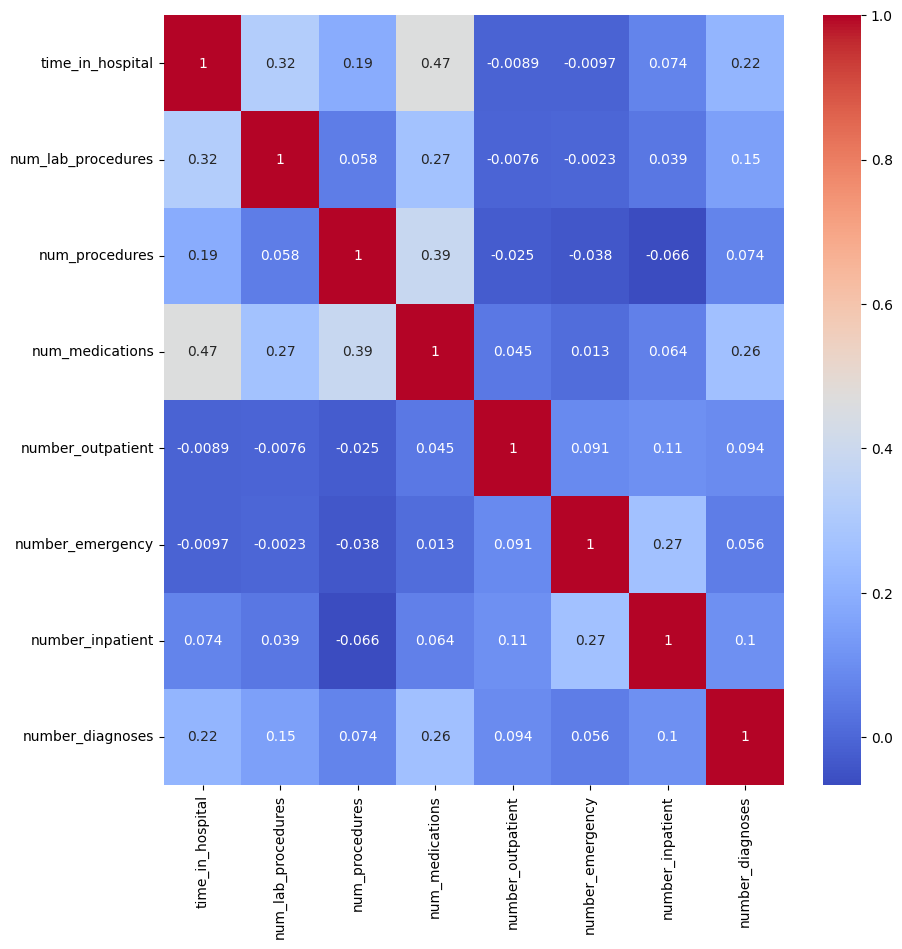

In [ ]:
# Correlation between numerical features
num_col = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# time_in_hospital and num_medication are relatively higher correlated, which makes sense,
# the more time you stayed in the hospital, the more medication would be used on you
# If conducting regression related analysis, need to be careful with multicollinearity

corr_matrix = df[num_col].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Observing discharge disposition code to see if anything can be simplified
for i in range(0, 30):
    print(discharge_disposition_code.iloc[i]['discharge_disposition_id'], discharge_disposition_code.iloc[i]['description'])

1 Discharged to home
2 Discharged/transferred to another short term hospital
3 Discharged/transferred to SNF
4 Discharged/transferred to ICF
5 Discharged/transferred to another type of inpatient care institution
6 Discharged/transferred to home with home health service
7 Left AMA
8 Discharged/transferred to home under care of Home IV provider
9 Admitted as an inpatient to this hospital
10 Neonate discharged to another hospital for neonatal aftercare
11 Expired
12 Still patient or expected to return for outpatient services
13 Hospice / home
14 Hospice / medical facility
15 Discharged/transferred within this institution to Medicare approved swing bed
16 Discharged/transferred/referred another institution for outpatient services
17 Discharged/transferred/referred to this institution for outpatient services
18 nan
19 Expired at home. Medicaid only, hospice.
20 Expired in a medical facility. Medicaid only, hospice.
21 Expired, place unknown. Medicaid only, hospice.
22 Discharged/transferred

Basing on some common sense: Since the objective is to predict readmissions, those patients who died during this hospital admission were excluded. Encounters with “Discharge disposition” values of 11, 13, 14, 19, 20, or 21 are related to death or hospice which mean these patients cannot be readmitted.

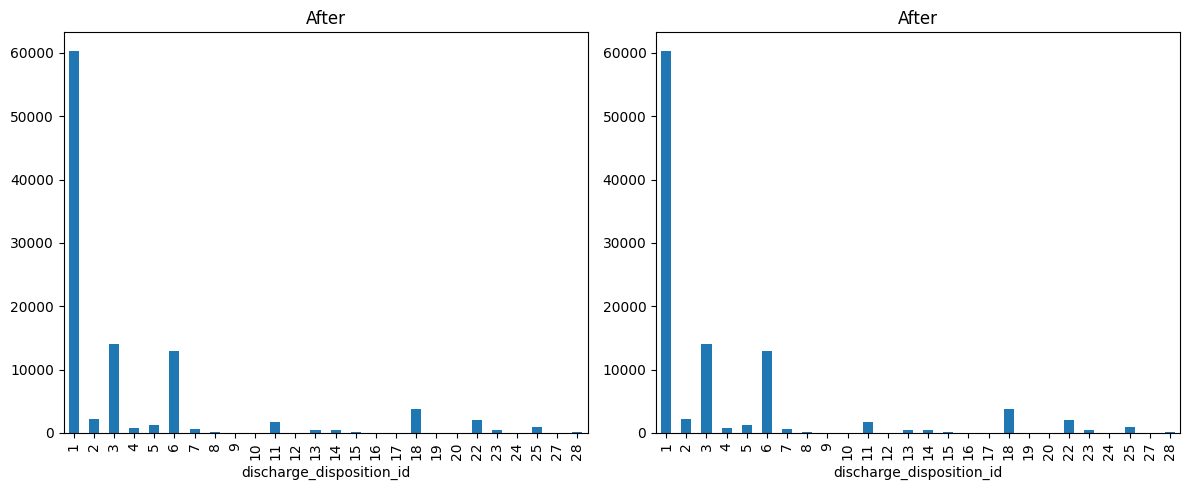

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df["discharge_disposition_id"].value_counts().sort_index().plot(kind="bar")
plt.title("After")

remove_values = [11, 13, 14, 19, 20, 21]
clean_df = clean_df[~clean_df["discharge_disposition_id"].isin(remove_values)]

plt.subplot(1, 2, 2)
df["discharge_disposition_id"].value_counts().sort_index().plot(kind="bar")
plt.title("After")

plt.tight_layout()
plt.show()

For reducing complexity, reducing dimension of the admission_type_id from 8 types to 4 types
- Combine Emergency, Urgent, and Trauma Center into a single category (e.g., "Urgent/Emergency").
- Combine Not Available, Not Mapped, and NaN into a single category (e.g., "Unknown").
- Keep Elective and Newborn separate if they hold distinct importance.

admission_type
Urgent/Emergency    67806
Elective            17998
Unknown              9858
Newborn                10
Name: count, dtype: int64


Text(0.5, 1.0, 'Admission Type')

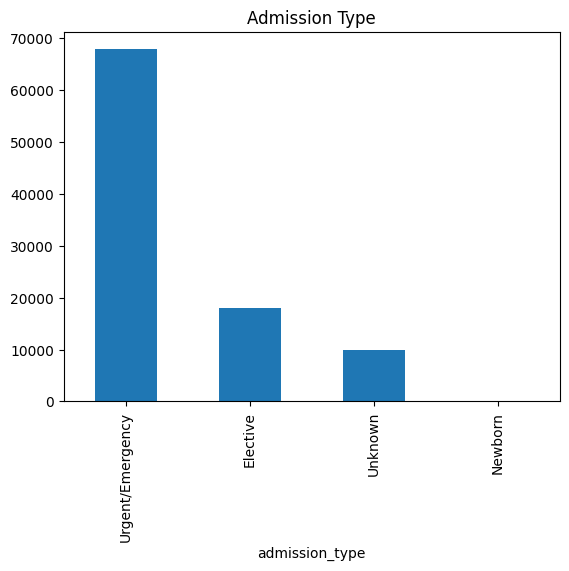

In [ ]:
# Define mapping for simplification
admission_mapping = {
    1: "Urgent/Emergency",  # Emergency
    2: "Urgent/Emergency",  # Urgent
    3: "Elective",
    4: "Newborn",
    5: "Unknown",  # Not Available
    6: "Unknown",  # NaN cases will be handled separately
    7: "Urgent/Emergency",  # Trauma Center
    8: "Unknown"  # Not Mapped
}

# Apply mapping
clean_df["admission_type"] = clean_df["admission_type_id"].map(admission_mapping)
clean_df["admission_type"] = clean_df["admission_type"].astype("category")
print(clean_df.admission_type.value_counts())
clean_df.admission_type.value_counts().plot(kind="bar")
plt.title("Admission Type")

admission_sources
Emergency               54333
Referral-Based          29150
Other/Unknown            6555
Transferred              5570
Legal/Social Service       64
Name: count, dtype: int64


Text(0.5, 1.0, 'Admission Sources')

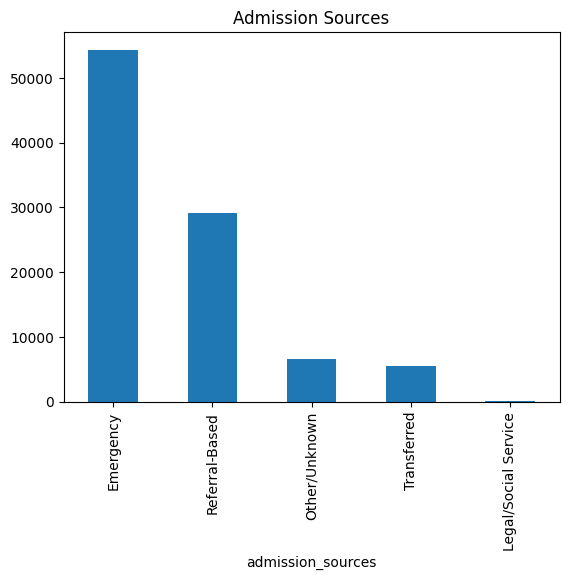

In [ ]:
# Mapping admission_source_id
admission_source_mapping_by_id = {
    1: "Referral-Based",  # Physician, Clinic, HMO Referral
    2: "Referral-Based",
    3: "Referral-Based",
    4: "Transferred",  # Transfers from hospital, SNF, healthcare facilities
    5: "Transferred",
    6: "Transferred",
    10: "Transferred",
    18: "Transferred",
    22: "Transferred",
    25: "Transferred",
    7: "Emergency",  # Emergency Room Admission
    8: "Legal/Social Service",  # Court/Law Enforcement, Social Services
    9: "Legal/Social Service",
    13: "Legal/Social Service",
    11: "Other/Unknown",  # Miscellaneous or unknown sources
    12: "Other/Unknown",
    14: "Other/Unknown",
    15: "Other/Unknown",
    16: "Other/Unknown",
    17: "Other/Unknown",
    19: "Other/Unknown",
    20: "Other/Unknown",
    21: "Other/Unknown",
    23: "Other/Unknown",
    24: "Other/Unknown",
    26: "Other/Unknown"
}

# Apply mapping
clean_df["admission_sources"] = clean_df["admission_source_id"].map(admission_source_mapping_by_id)
clean_df["admission_sources"] = clean_df["admission_sources"].astype("category")
print(clean_df.admission_sources.value_counts())
clean_df.admission_sources.value_counts().plot(kind="bar")
plt.title("Admission Sources")

In [ ]:
# Re-import necessary libraries
import plotly.graph_objects as go

# Define the mappings for admission_type_id
admission_type_mapping = {
    "Emergency/Urgent": [1, 2],  # Emergency and Urgent admissions
    "Elective": [3],  # Elective admissions
    "Newborn": [4],  # Newborn admissions
    "Other/Unknown": [5, 6, 7, 8]  # Not Available, Trauma, and Unmapped cases
}

# Define the mappings for admission_source_id
admission_source_mapping = {
    "Referral-Based": [1, 2, 3],  # Physician, Clinic, HMO Referral
    "Transferred": [4, 5, 6, 10, 18, 22, 25],  # Transfers from hospital, SNF, healthcare facilities
    "Emergency": [7],  # Emergency Room Admission
    "Legal/Social Service": [8, 9, 13],  # Court/Law Enforcement, Social Services
    "Other/Unknown": [11, 12, 14, 15, 16, 17, 19, 20, 21, 23, 24, 26]  # Miscellaneous or unknown sources
}

# Function to generate a Sankey diagram for a given mapping
def create_sankey_chart(mapping, title):
    source = []
    target = []
    value = []

    # Extract mapping relationships for Sankey diagram
    for category, ids in mapping.items():
        for _id in ids:
            source.append(f"ID {_id}")  # Convert ID to string for visualization
            target.append(category)  # Map to larger group
            value.append(1)  # Each ID contributes equally

    # Create a list of unique labels for Sankey nodes
    unique_labels = list(set(source + target))

    # Create a Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=unique_labels,  # Unique labels for all nodes
        ),
        link=dict(
            source=[unique_labels.index(s) for s in source],  # Convert to indices
            target=[unique_labels.index(t) for t in target],  # Convert to indices
            value=value
        )
    ))

    # Update layout
    fig.update_layout(title_text=title, font_size=18, template="plotly_white")

    # Show plot
    fig.show()

# Create Sankey diagrams for admission_type_id and admission_source_id
create_sankey_chart(admission_type_mapping, "Admission Type ID Grouping")
create_sankey_chart(admission_source_mapping, "Sankey Diagram: Admission Source ID Grouping")


discharge_dispositions
Home Discharge    70235
Transferred       19866
Other/Unknown      4979
Left AMA            592
Name: count, dtype: int64


Text(0.5, 1.0, 'Discharge Dispositions')

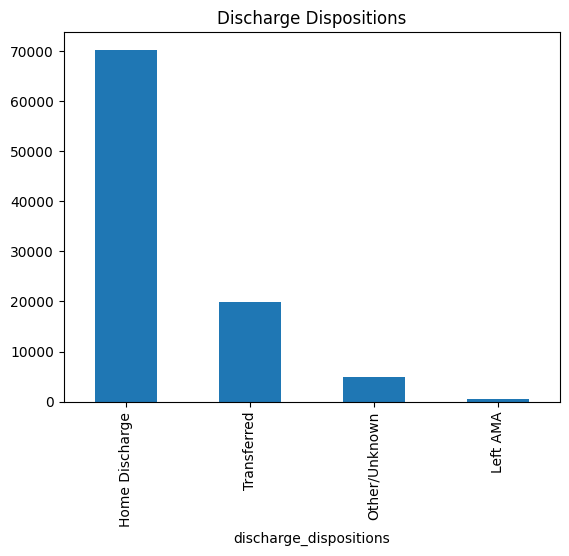

In [ ]:
# Mapping discharge disposition id
discharge_disposition_mapping = {
    1: "Home Discharge",  # Home and Home with Health Service
    6: "Home Discharge",
    2: "Transferred",  # Transfers to other healthcare facilities
    3: "Transferred",
    4: "Transferred",
    5: "Transferred",
    22: "Transferred",
    23: "Transferred",
    7: "Left AMA",  # Left against medical advice
    11: "Deceased/Hospice",  # Deceased or Hospice care
    13: "Deceased/Hospice",
    14: "Deceased/Hospice",
    19: "Deceased/Hospice",
    20: "Deceased/Hospice",
    21: "Deceased/Hospice",
    8: "Other/Unknown",  # Miscellaneous cases
    9: "Other/Unknown",
    10: "Other/Unknown",
    12: "Other/Unknown",
    15: "Other/Unknown",
    16: "Other/Unknown",
    17: "Other/Unknown",
    18: "Other/Unknown",
    24: "Other/Unknown",
    25: "Other/Unknown",
    26: "Other/Unknown",
    27: "Other/Unknown",
    28: "Other/Unknown",
    29: "Other/Unknown",
    30: "Other/Unknown"
}
# There won't be deceased and in hospice since we removed them earlier
# Apply mapping
clean_df["discharge_dispositions"] = clean_df["discharge_disposition_id"].map(discharge_disposition_mapping)
clean_df["discharge_dispositions"] = clean_df["discharge_dispositions"].astype("category")
print(clean_df.discharge_dispositions.value_counts())
clean_df.discharge_dispositions.value_counts().plot(kind="bar")
plt.title("Discharge Dispositions")

In [ ]:
# Re-import necessary libraries
import plotly.graph_objects as go

# Define the mappings again after reset
discharge_disposition_mapping = {
    "Home Discharge": [1, 6],
    "Transferred": [2, 3, 4, 5, 22, 23],
    "Left AMA": [7],
    "Deceased/Hospice": [11, 13, 14, 19, 20, 21],
    "Other/Unknown": [8, 9, 10, 12, 15, 16, 17, 18, 24, 25, 26, 27, 28, 29, 30]
}

# Prepare data for the Sankey chart
source = []  # Original discharge_disposition_id values
target = []  # Corresponding larger category
value = []   # Count of occurrences

# Extract mapping relationships for Sankey diagram
for category, ids in discharge_disposition_mapping.items():
    for _id in ids:
        source.append(f"ID {_id}")  # Convert ID to string for visualization
        target.append(category)  # Map to larger group
        value.append(1)  # Each ID contributes equally

# Create a list of unique labels for Sankey nodes
unique_labels = list(set(source + target))

# Create a Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_labels,  # Unique labels for all nodes
    ),
    link=dict(
        source=[unique_labels.index(s) for s in source],  # Convert to indices
        target=[unique_labels.index(t) for t in target],  # Convert to indices
        value=value
    )
))

# Update layout
fig.update_layout(title_text="Sankey Diagram: Discharge Disposition ID Grouping", font_size=14, template="plotly_white")

# Show plot
fig.show()


**Decoding diag_1 for better interpretability**
inspired by: https://www.kaggle.com/code/chongchong33/predicting-hospital-readmission-of-diabetics/notebook
Quote:
- "The 'diag_1' contained three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700-900 unique ICD codes and it is extremely difficult to include them in the model and interpret them meaningfully. Therefore, these diagnosis codes were collapsed into 9 disease categories, which include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others (See Table below)"


![Alt text](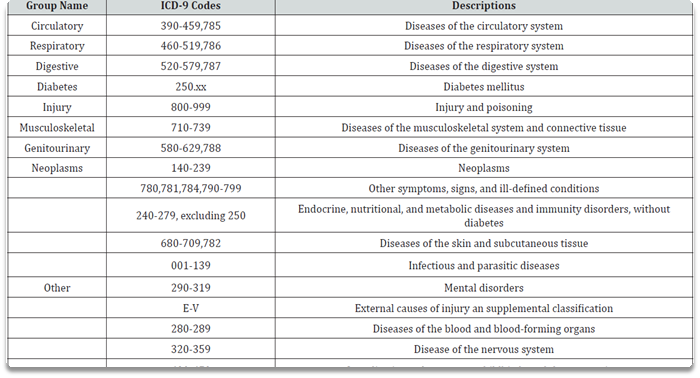 "a title")

In [ ]:
clean_df['diag_1'] = clean_df['diag_1'].astype(str)  # Ensure 'diag_1' is a string
clean_df['diag_2'] = clean_df['diag_2'].astype(str)
clean_df['diag_3'] = clean_df['diag_3'].astype(str)

# Define a function to categorize primary diagnosis
def categorize_primary_diagnosis(diag):
    if re.match(r"^[VE]", diag):  # Starts with "V" or "E"
        return "Other"
    elif re.match(r"^250", diag):  # Exactly "250"
        return "Diabetes"
    else:
        try:
            code = int(diag)  # Convert to integer if possible
            if 390 <= code <= 459 or code == 785:
                return "Circulatory"
            elif 460 <= code <= 519 or code == 786:
                return "Respiratory"
            elif 520 <= code <= 579 or code == 787:
                return "Digestive"
            elif 580 <= code <= 629 or code == 788:
                return "Genitourinary"
            elif 140 <= code <= 239:
                return "Neoplasms"
            elif 710 <= code <= 739:
                return "Musculoskeletal"
            elif 800 <= code <= 999:
                return "Injury"
            else:
                return "Other"
        except ValueError:  # If conversion fails (e.g., non-numeric values)
            return "Other"


primary_diagnosis_1
Circulatory        28887
Other              17169
Respiratory        13511
Digestive           9045
Diabetes            7870
Injury              6590
Genitourinary       4870
Musculoskeletal     4717
Neoplasms           3013
Name: count, dtype: int64


Text(0.5, 1.0, 'Primary Diagnosis 1')

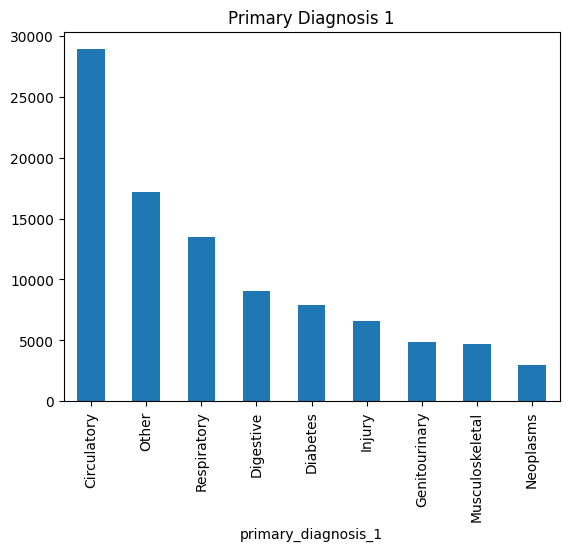

In [ ]:
# Apply function to create a new column 'primary_diagnosis'
clean_df['primary_diagnosis_1'] = clean_df['diag_1'].apply(categorize_primary_diagnosis)
print(clean_df.primary_diagnosis_1.value_counts())
clean_df.primary_diagnosis_1.value_counts().plot(kind="bar")
plt.title("Primary Diagnosis 1")


primary_diagnosis_2
Circulatory        30397
Other              25148
Diabetes           11776
Respiratory        10140
Genitourinary       7977
Digestive           3967
Injury              2286
Neoplasms           2274
Musculoskeletal     1707
Name: count, dtype: int64


Text(0.5, 1.0, 'Primary Diagnosis 2')

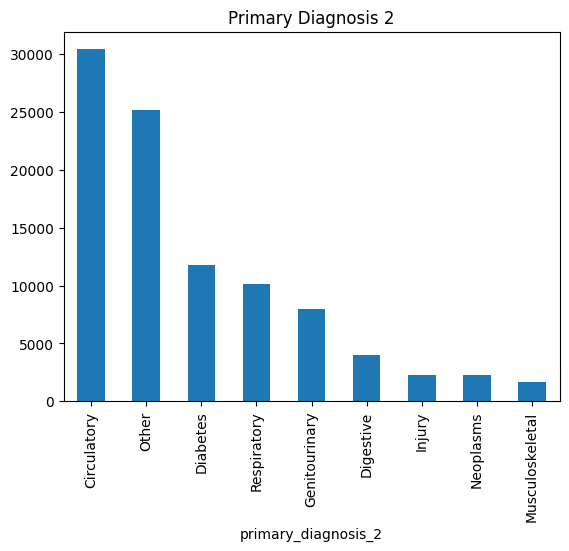

In [ ]:

clean_df['primary_diagnosis_2'] = clean_df['diag_2'].apply(categorize_primary_diagnosis)
print(clean_df.primary_diagnosis_2.value_counts())
clean_df.primary_diagnosis_2.value_counts().plot(kind="bar")
plt.title("Primary Diagnosis 2")


primary_diagnosis_3
Circulatory        28937
Other              27980
Diabetes           16522
Respiratory         6853
Genitourinary       6285
Digestive           3780
Musculoskeletal     1845
Injury              1844
Neoplasms           1626
Name: count, dtype: int64


Text(0.5, 1.0, 'Primary Diagnosis 3')

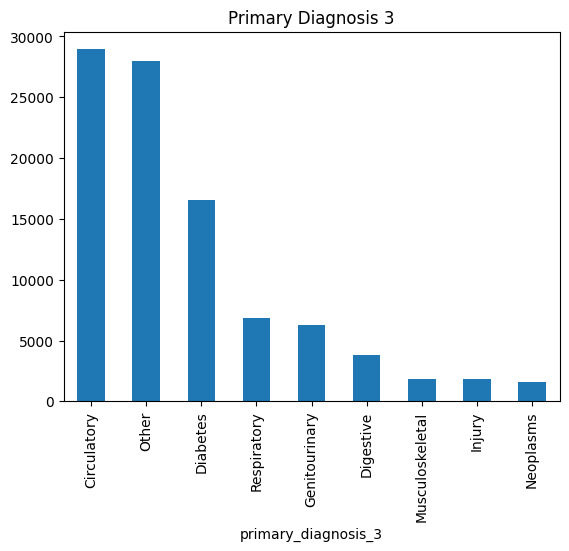

In [ ]:

clean_df['primary_diagnosis_3'] = clean_df['diag_3'].apply(categorize_primary_diagnosis)
print(clean_df.primary_diagnosis_3.value_counts())
clean_df.primary_diagnosis_3.value_counts().plot(kind="bar")
plt.title("Primary Diagnosis 3")

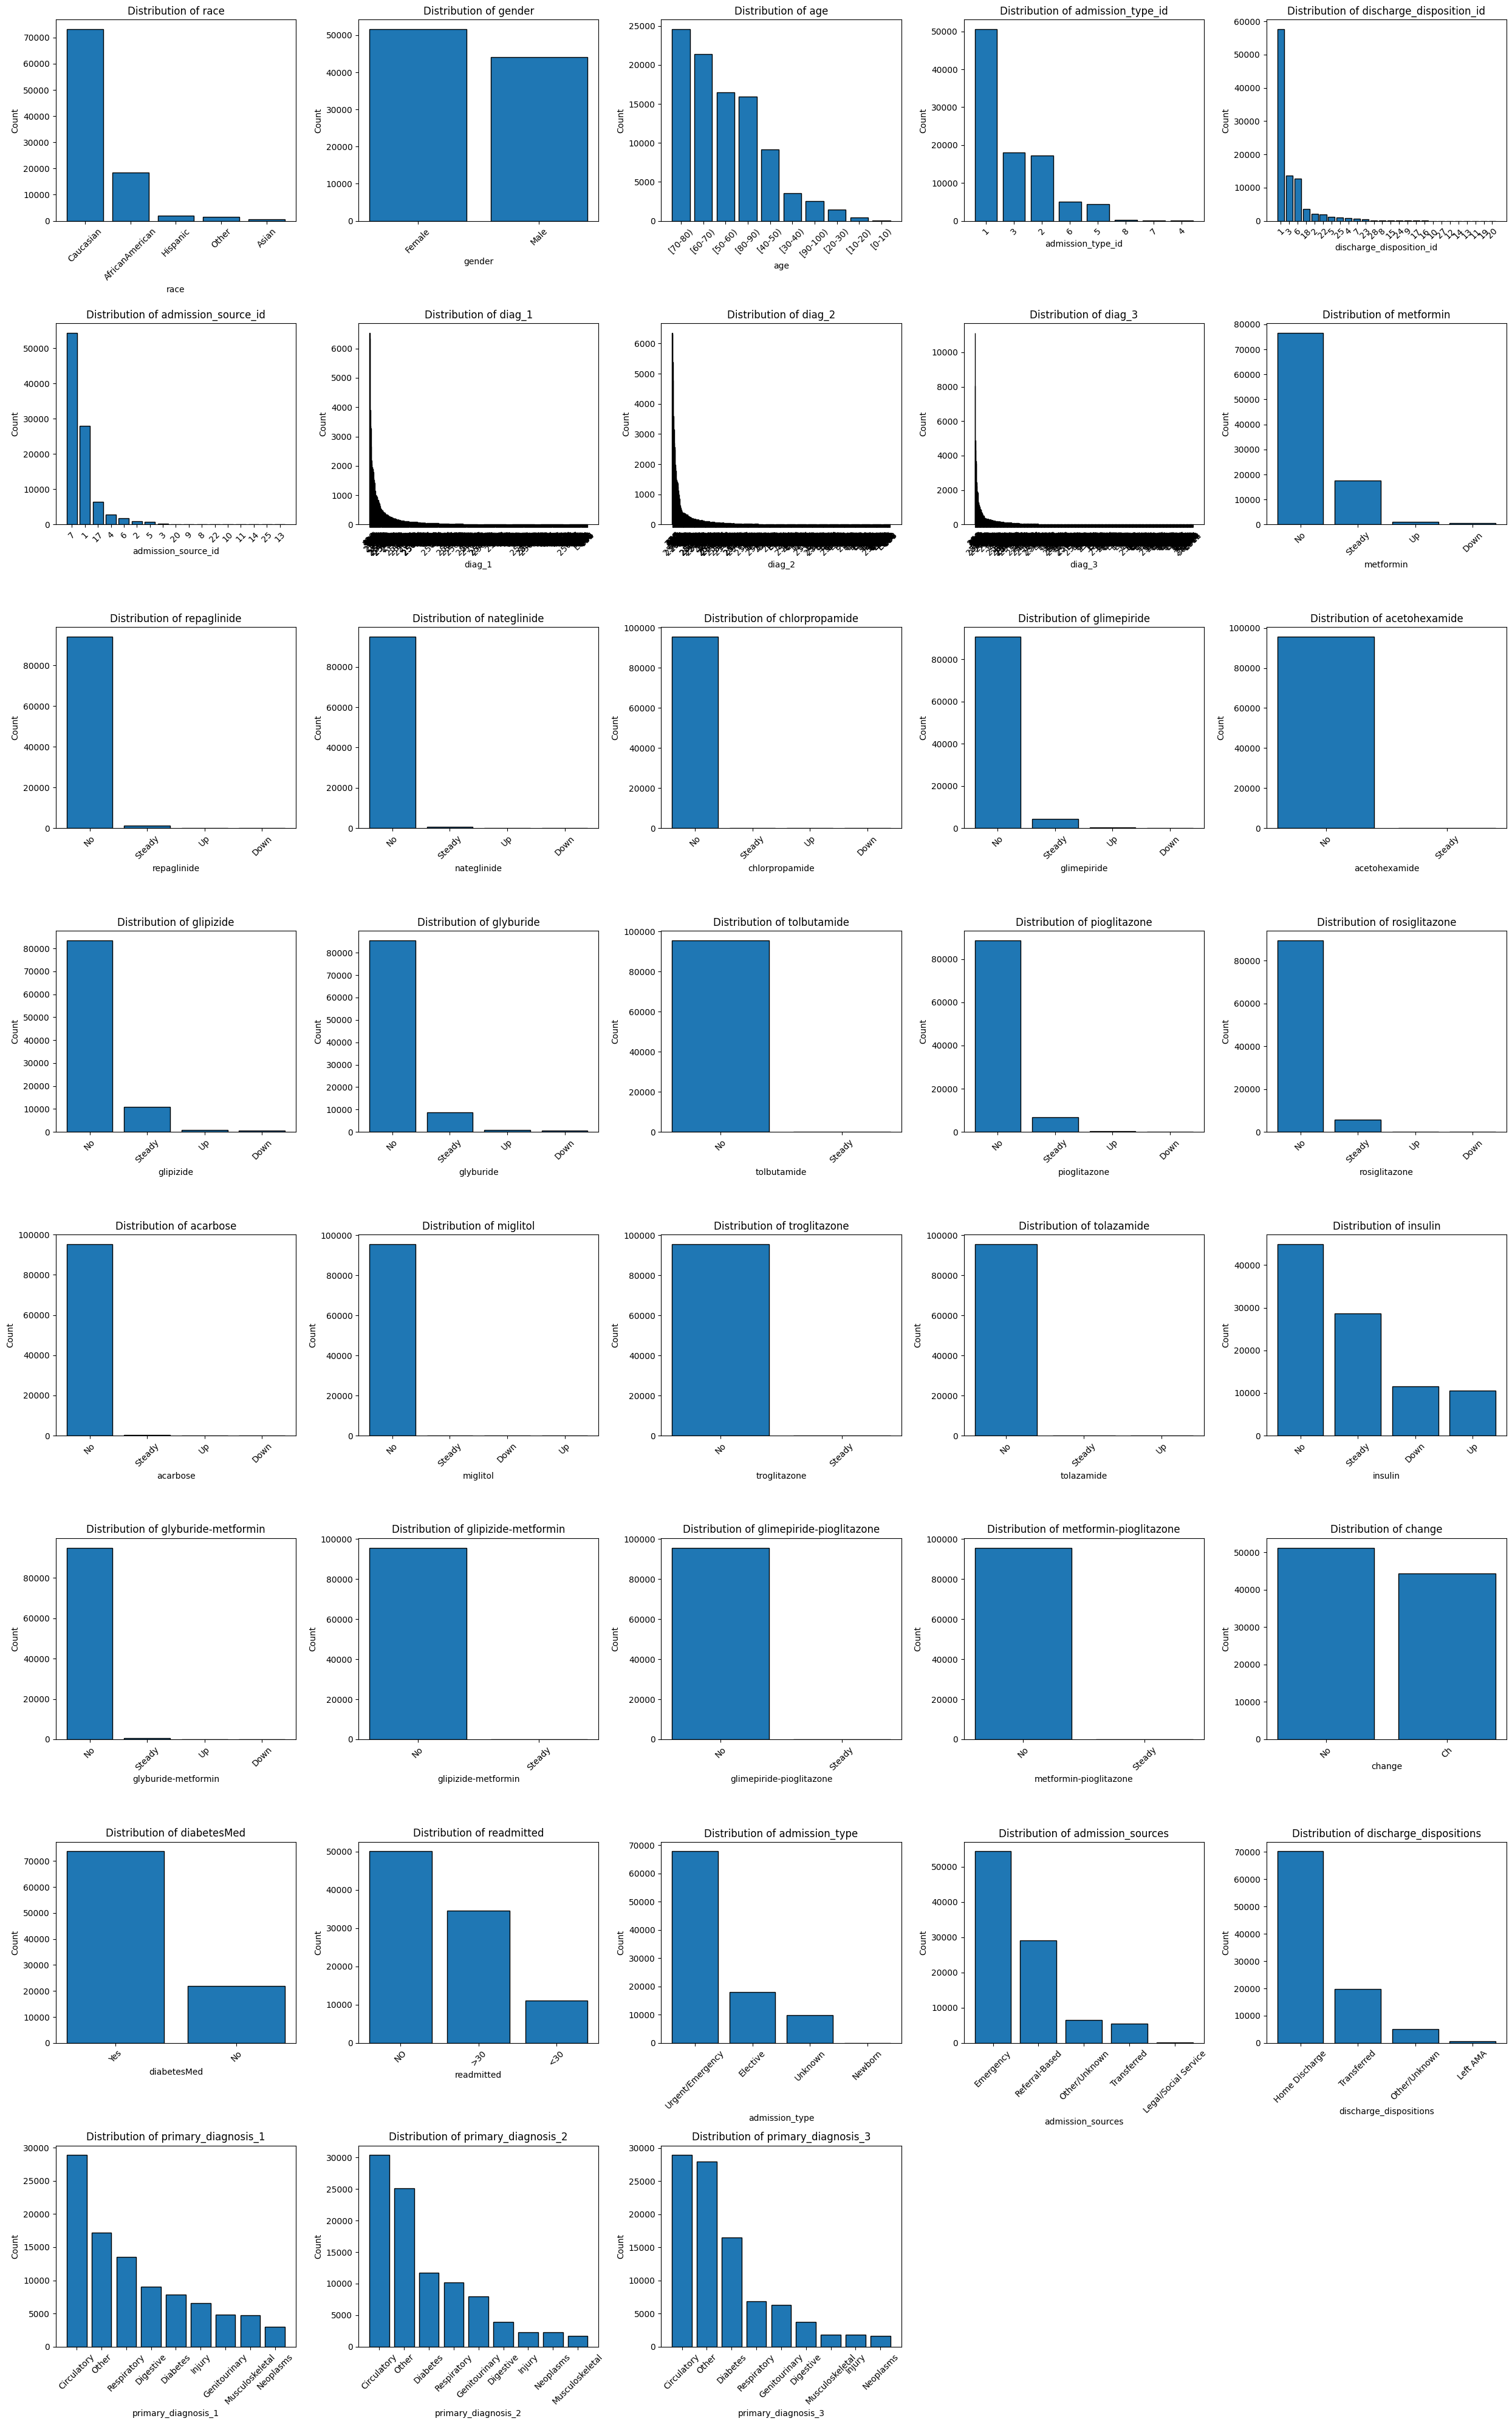

In [ ]:
# Looking for all categorical data's value distribution
def plot_categorical_distributions(dataframe):
    # Select columns with 'object' or 'category' dtype
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    n = len(categorical_columns)
    ncols = 5
    nrows = math.ceil(n / ncols)

    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
    axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]
    for i, col in enumerate(categorical_columns):
        value_counts = dataframe[col].value_counts()
        axes[i].bar(value_counts.index.astype(str), value_counts.values, edgecolor='black')
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_distributions(clean_df)

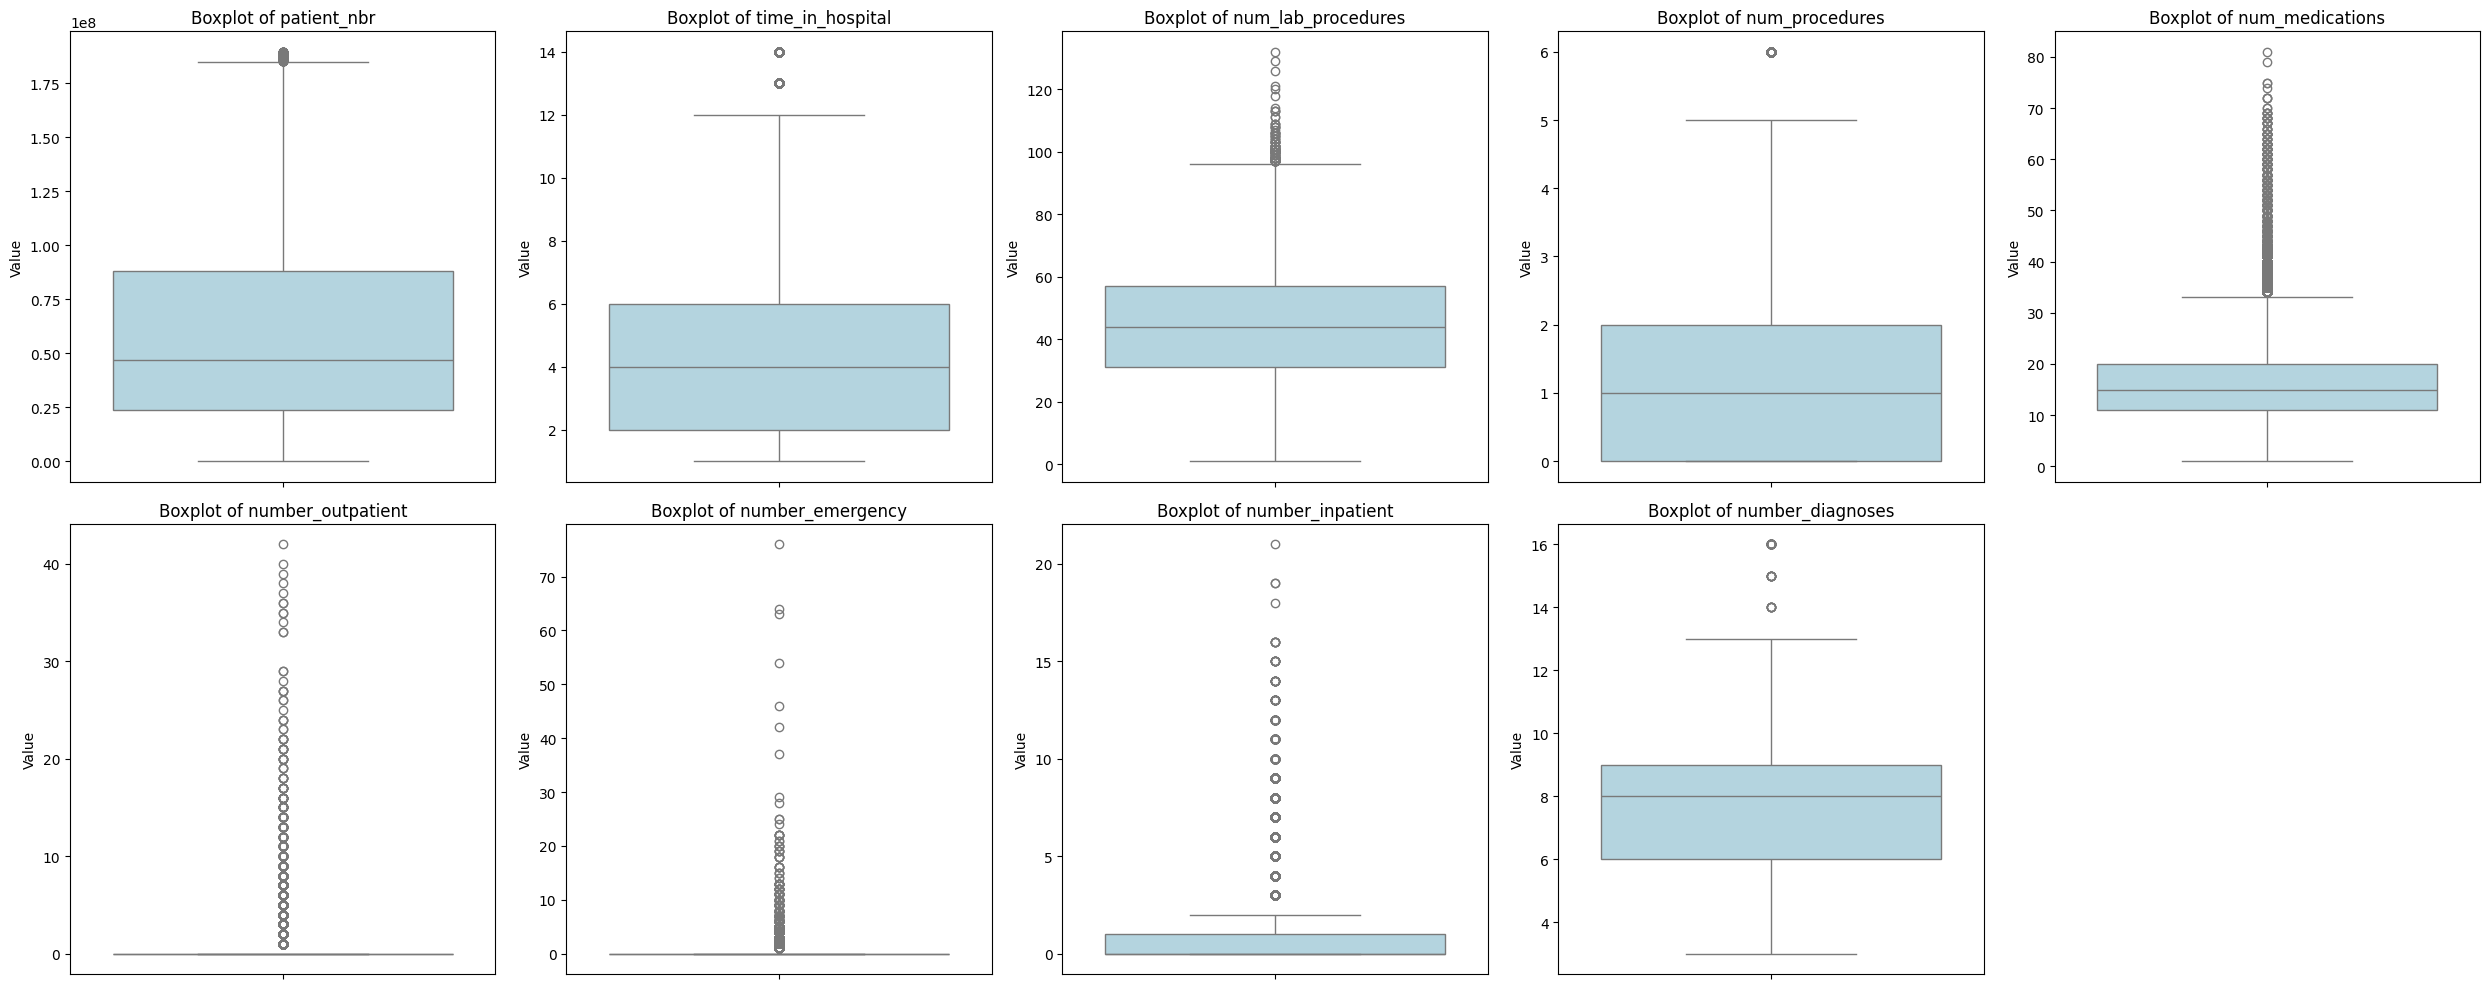

In [ ]:
# Visualize numerical features for outlier detection
def plot_numerical_boxplots(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number']).columns  # Select numerical columns

    n = len(numerical_columns)
    ncols = 5
    nrows = (n // ncols) + (n % ncols > 0)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.boxplot(y=dataframe[col], ax=axes[i], color="lightblue")
        axes[i].set_title(f"Boxplot of {col}")
        axes[i].set_ylabel("Value")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numerical_boxplots(clean_df)
# Please disregard patient_nbr

# Might need to apply log transformation or any other standardization since data is significantly skewed
# Apply log transformation to highly skewed variables (number_outpatient, number_emergency, num_medications).
# Standardize or normalize num_lab_procedures, num_medications, and num_procedures to improve model performance.

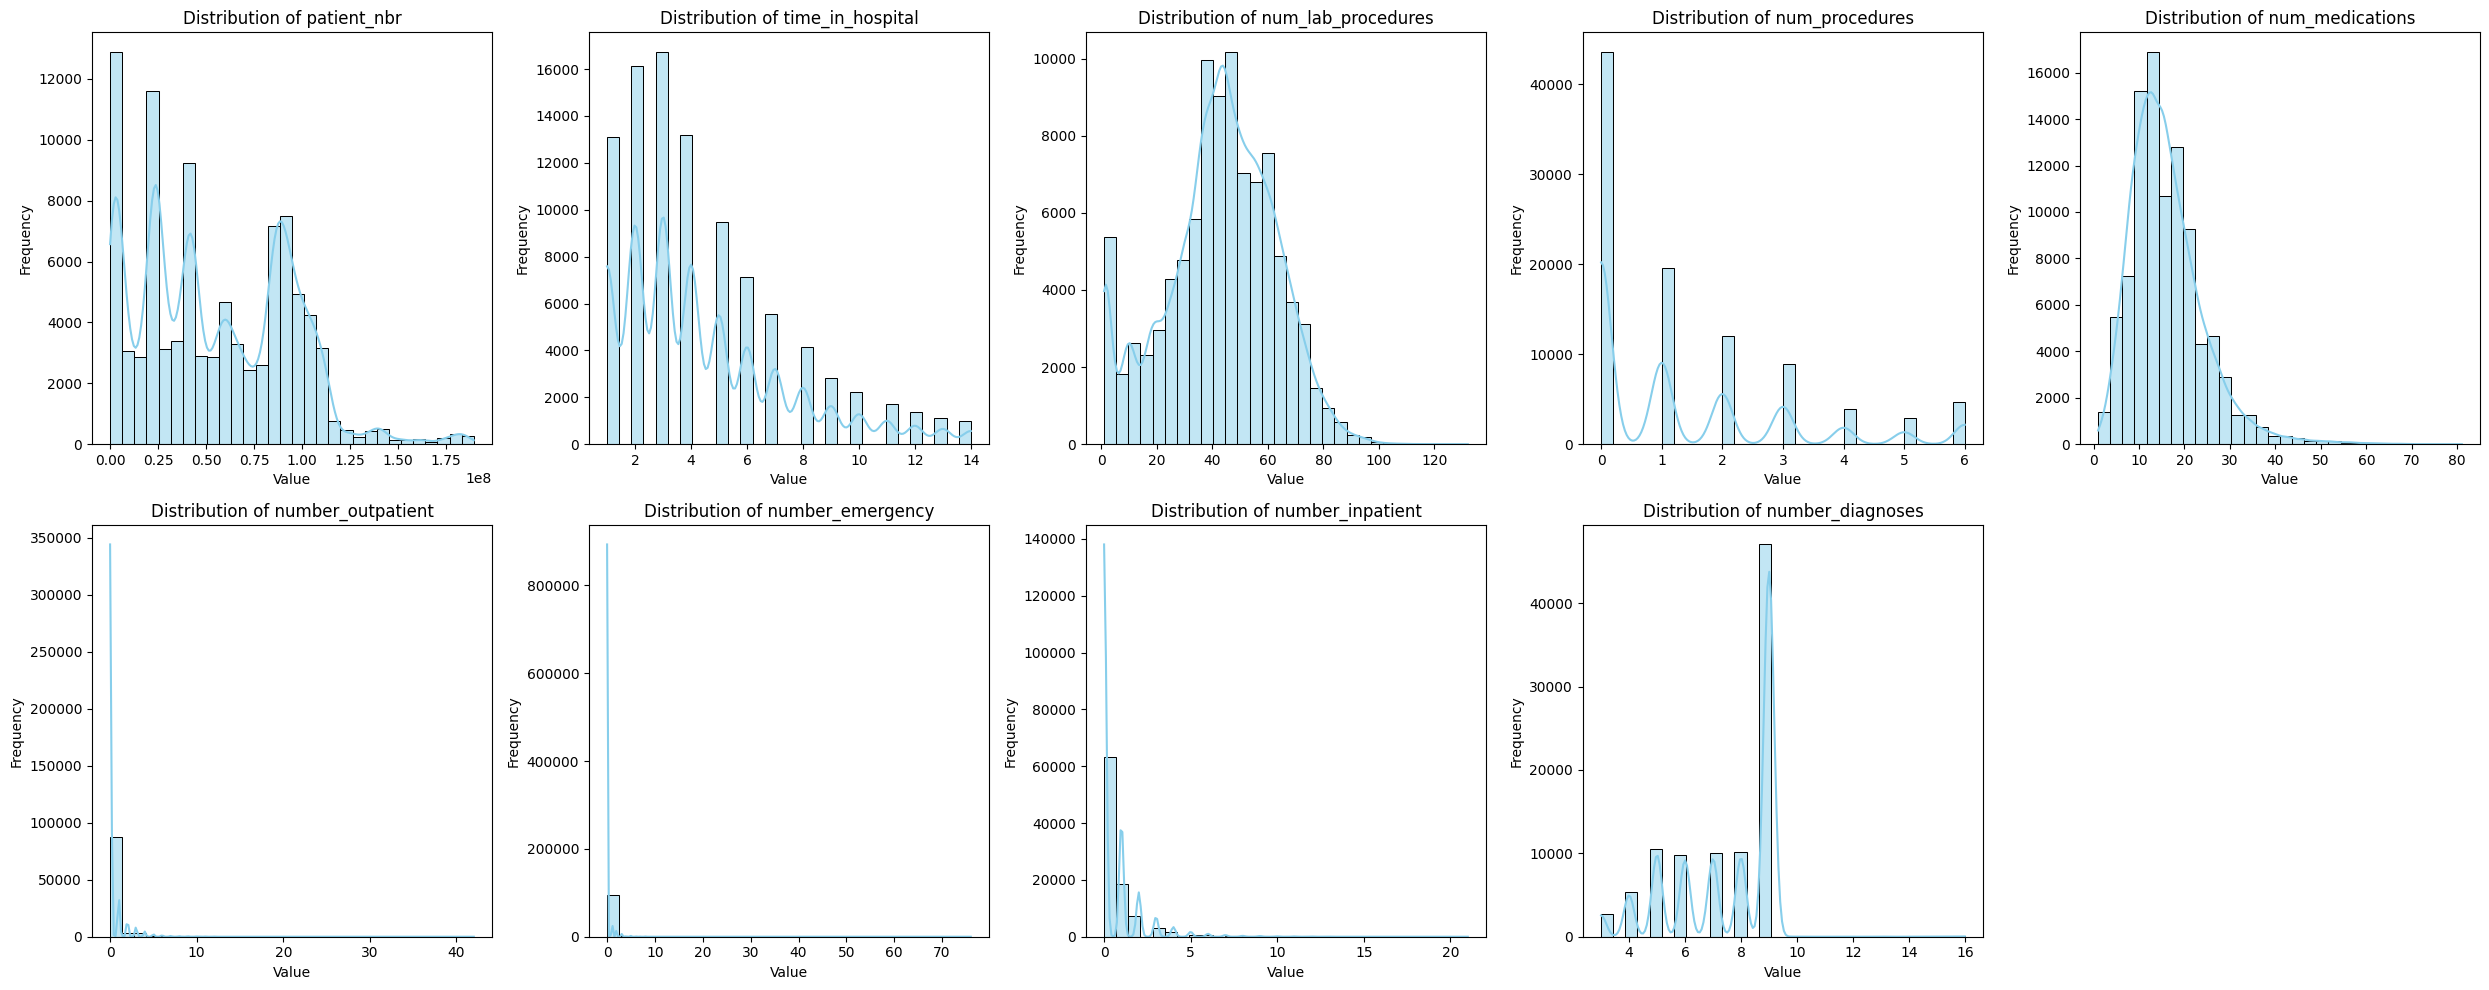

In [ ]:
def plot_numerical_distributions(dataframe):
    numerical_columns = dataframe.select_dtypes(include=['number']).columns

    n = len(numerical_columns)
    ncols = 5
    nrows = (n // ncols) + (n % ncols > 0)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.histplot(dataframe[col], bins=30, kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
plot_numerical_distributions(clean_df)

In [ ]:
# Investigate outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Get outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers

# Finding outliers in 'num_medications'
outliers_num_medications = detect_outliers_iqr(clean_df, "num_medications")
outliers_num_medications

# Will come back to this later

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,admission_sources,discharge_dispositions,primary_diagnosis_1,primary_diagnosis_2,primary_diagnosis_3
149,1741662,Caucasian,Male,[70-80),6,25,7,8,61,2,...,No,Ch,Yes,>30,Unknown,Emergency,Other/Unknown,Digestive,Digestive,Circulatory
336,442341,Caucasian,Male,[30-40),6,25,4,12,103,4,...,No,Ch,Yes,NO,Unknown,Transferred,Other/Unknown,Respiratory,Circulatory,Diabetes
361,3656088,Caucasian,Female,[60-70),1,1,7,8,77,4,...,No,No,Yes,>30,Urgent/Emergency,Emergency,Home Discharge,Circulatory,Respiratory,Other
411,78047901,Caucasian,Male,[50-60),2,1,4,8,76,6,...,No,Ch,Yes,NO,Urgent/Emergency,Transferred,Home Discharge,Circulatory,Circulatory,Respiratory
466,5193639,Caucasian,Female,[50-60),2,1,4,10,71,6,...,No,Ch,Yes,NO,Urgent/Emergency,Transferred,Home Discharge,Circulatory,Circulatory,Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101572,44946270,Caucasian,Male,[50-60),1,1,7,4,41,3,...,No,Ch,Yes,>30,Urgent/Emergency,Emergency,Home Discharge,Circulatory,Circulatory,Circulatory
101587,141485063,AfricanAmerican,Male,[20-30),1,1,7,12,101,6,...,No,Ch,Yes,NO,Urgent/Emergency,Emergency,Home Discharge,Diabetes,Circulatory,Musculoskeletal
101619,91263078,Caucasian,Female,[70-80),3,3,1,4,7,1,...,No,No,Yes,NO,Elective,Referral-Based,Transferred,Musculoskeletal,Other,Musculoskeletal
101716,93806559,Other,Male,[70-80),2,3,7,8,67,3,...,No,Ch,Yes,NO,Urgent/Emergency,Emergency,Transferred,Digestive,Diabetes,Other


In [ ]:
final_df = clean_df.drop(columns=['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3'])
final_df

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,admission_sources,discharge_dispositions,primary_diagnosis_1,primary_diagnosis_2,primary_diagnosis_3
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,Ch,Yes,>30,Urgent/Emergency,Emergency,Home Discharge,Other,Diabetes,Other
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,Yes,NO,Urgent/Emergency,Emergency,Home Discharge,Other,Diabetes,Other
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,Ch,Yes,NO,Urgent/Emergency,Emergency,Home Discharge,Other,Diabetes,Circulatory
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,Ch,Yes,NO,Urgent/Emergency,Emergency,Home Discharge,Neoplasms,Neoplasms,Diabetes
5,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,Yes,>30,Urgent/Emergency,Referral-Based,Home Discharge,Circulatory,Circulatory,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,51,0,16,0,0,0,...,No,Ch,Yes,>30,Urgent/Emergency,Emergency,Transferred,Diabetes,Other,Circulatory
101762,AfricanAmerican,Female,[80-90),5,33,3,18,0,0,1,...,No,No,Yes,NO,Urgent/Emergency,Transferred,Transferred,Digestive,Other,Digestive
101763,Caucasian,Male,[70-80),1,53,0,9,1,0,0,...,No,Ch,Yes,NO,Urgent/Emergency,Emergency,Home Discharge,Other,Genitourinary,Other
101764,Caucasian,Female,[80-90),10,45,2,21,0,0,1,...,No,Ch,Yes,NO,Urgent/Emergency,Emergency,Transferred,Injury,Other,Injury


In [ ]:
clean_df.to_parquet('cleaned_hospital_readmission.parquet')

## Feature Importance
Trying with two methods;
- Filter: SelectKBest with Mutual Information
- Wrapper: Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

#label encode first since most of our categorical data is in string format
categorical_features = final_df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col])
    label_encoders[col] = le

X = final_df.drop("readmitted", axis=1)  # Drop the target variable
y = final_df["readmitted"]

selector = SelectKBest(score_func=mutual_info_classif, k=30)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['race', 'gender', 'time_in_hospital', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'insulin', 'glyburide-metformin', 'change', 'diabetesMed',
       'admission_type', 'admission_sources', 'discharge_dispositions',
       'primary_diagnosis_1', 'primary_diagnosis_2', 'primary_diagnosis_3'],
      dtype='object')


In [ ]:
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "Score": selector.scores_
})

feature_scores = feature_scores.sort_values(by="Score", ascending=False)
feature_scores

,Feature,Score
9,number_inpatient,0.032321
15,glimepiride,0.012812
7,number_outpatient,0.011995
23,miglitol,0.011591
22,acarbose,0.010418
8,number_emergency,0.010089
10,number_diagnoses,0.010019
32,diabetesMed,0.009551
13,nateglinide,0.009465
33,admission_type,0.008752


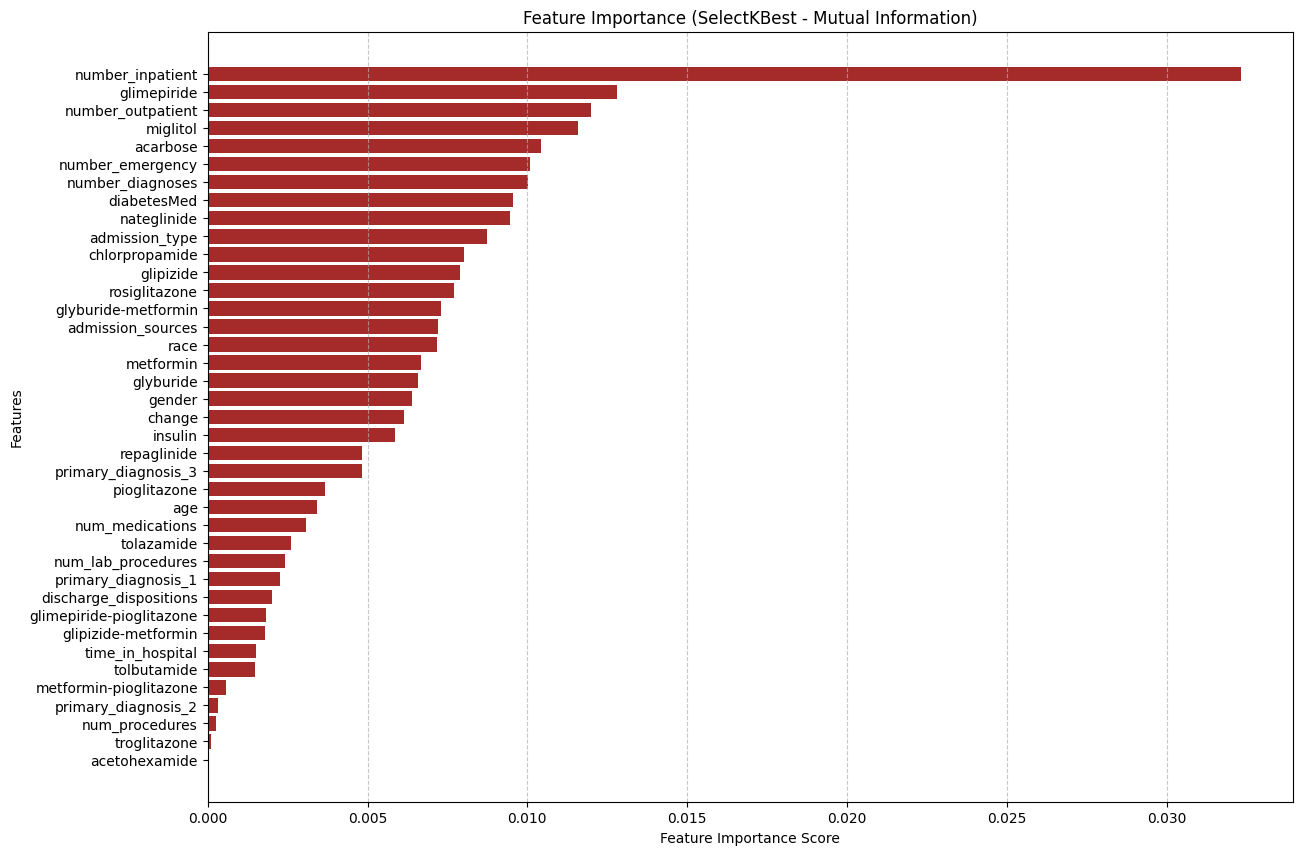

In [ ]:
plt.figure(figsize=(14, 10))
y_positions = range(len(feature_scores))  # Custom y positions for spacing
plt.barh(y_positions, feature_scores["Score"], color="brown", height=0.8)
plt.yticks(y_positions, feature_scores["Feature"])  # Manually set feature labels
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (SelectKBest - Mutual Information)")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
# Further reduce dimensionality using Wrapper Method
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
filter_selected_features = ['race', 'gender', 'age', 'time_in_hospital', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'admission_type',
       'admission_sources', 'discharge_dispositions', 'primary_diagnosis_1',
       'primary_diagnosis_2', 'primary_diagnosis_3']

X_1st_reduced = final_df[filter_selected_features]

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=7)  # Select top 7 features
X_rfe = rfe.fit_transform(X_1st_reduced, y)

# Show selected features
rfe_selected_features = X_1st_reduced.columns[rfe.support_]
print(rfe_selected_features)


Index(['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'primary_diagnosis_1', 'primary_diagnosis_2', 'primary_diagnosis_3'],
      dtype='object')


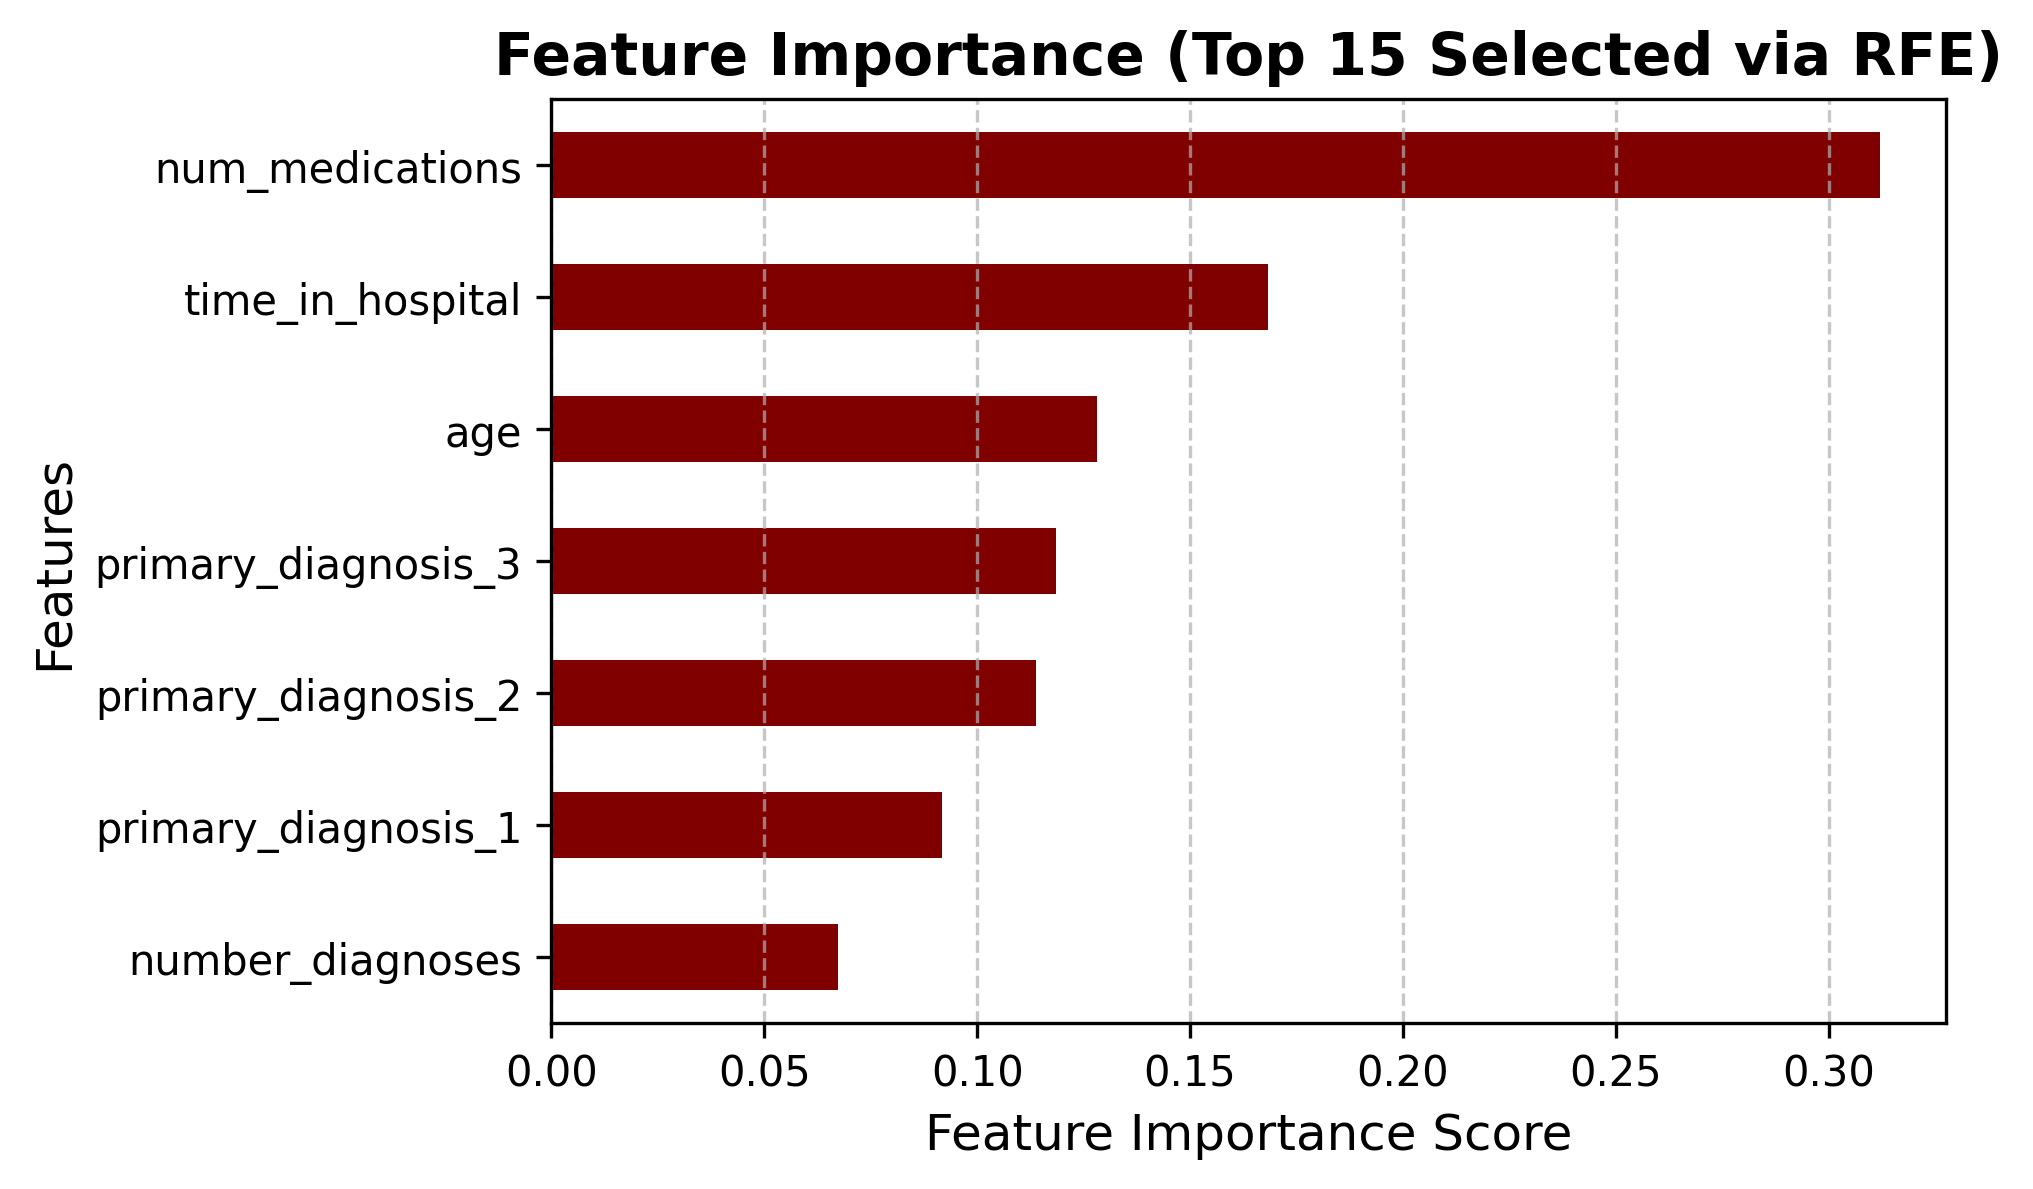

In [ ]:
# Extract feature rankings and importance
feature_importance = pd.Series(rfe.ranking_, index=X_1st_reduced.columns)
selected_features = feature_importance[feature_importance == 1].index

# Fit a new RandomForest model to the reduced feature set for importance scores
model.fit(X_1st_reduced[selected_features], y)
importances = pd.Series(model.feature_importances_, index=selected_features)

# Sort features by importance
importances = importances.sort_values(ascending=True)

# Plot feature importance
plt.figure(figsize=(6, 4), dpi=300)
importances.plot(kind='barh', color='#800000')
plt.xlabel("Feature Importance Score", fontsize=12, fontname="Helvetica")
plt.ylabel("Features", fontsize=12, fontname="Helvetica")
plt.title("Feature Importance (Top 15 Selected via RFE)", fontsize=14, fontname="Helvetica", fontweight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.show()

In [ ]:
rfe_feature_scores = pd.DataFrame({
    "Feature": X_1st_reduced.columns,
    "Ranking": rfe.ranking_
})
rfe_feature_scores = rfe_feature_scores.sort_values(by="Ranking", ascending=True)
rfe_feature_scores

,Feature,Ranking
3,time_in_hospital,1
2,age,1
4,num_medications,1
8,number_diagnoses,1
29,primary_diagnosis_3,1
27,primary_diagnosis_1,1
28,primary_diagnosis_2,1
20,insulin,2
7,number_inpatient,3
0,race,4


## Defining Modeling used dataframe

In [ ]:
modeling_df = clean_df.copy()
# first encode reamitted to 1 / 0, 1 for early readmitted, 0 for none early readmitted
modeling_df['readmitted'] = modeling_df['readmitted'].apply(lambda x: 0 if x in [">30", "NO"] else 1)
modeling_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,admission_sources,discharge_dispositions,primary_diagnosis_1,primary_diagnosis_2,primary_diagnosis_3
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Ch,Yes,0,Urgent/Emergency,Emergency,Home Discharge,Other,Diabetes,Other
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,Yes,0,Urgent/Emergency,Emergency,Home Discharge,Other,Diabetes,Other
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Ch,Yes,0,Urgent/Emergency,Emergency,Home Discharge,Other,Diabetes,Circulatory
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Ch,Yes,0,Urgent/Emergency,Emergency,Home Discharge,Neoplasms,Neoplasms,Diabetes
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,...,No,No,Yes,0,Urgent/Emergency,Referral-Based,Home Discharge,Circulatory,Circulatory,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,...,No,Ch,Yes,0,Urgent/Emergency,Emergency,Transferred,Diabetes,Other,Circulatory
101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,...,No,No,Yes,0,Urgent/Emergency,Transferred,Transferred,Digestive,Other,Digestive
101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,...,No,Ch,Yes,0,Urgent/Emergency,Emergency,Home Discharge,Other,Genitourinary,Other
101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,...,No,Ch,Yes,0,Urgent/Emergency,Emergency,Transferred,Injury,Other,Injury


## Baseline Model Testing (Please disregard this and DO NOT RUN THIS)
- Using the top 7 Features eliminated using Relevance & RFM
- Just trying to run quick and easy models to see performance

``` python
['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'primary_diagnosis_1', 'primary_diagnosis_2', 'primary_diagnosis_3']
```

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 21.4 MB/s eta 0:00:00


In [ ]:
import cudf  # GPU-based pandas
import cupy as cp  # GPU-accelerated numpy
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import OneHotEncoder

from cuml.linear_model import LogisticRegression
from cuml.ensemble import RandomForestClassifier
from cuml.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier

# Select relevant features
base_model_features = ['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
                       'primary_diagnosis_1', 'primary_diagnosis_2', 'primary_diagnosis_3']
base_model_df = modeling_df.copy()
base_model_df = base_model_df[base_model_features + ['readmitted']]

target = 'readmitted'

# Splitting the data into train and test sets
X = base_model_df[base_model_features]
y = base_model_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numerical features
categorical_features = ['age', 'primary_diagnosis_1', 'primary_diagnosis_2', 'primary_diagnosis_3']
numerical_features = ['time_in_hospital', 'num_medications', 'number_diagnoses']

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_features]))

# Assign column names to encoded data
X_train_encoded.columns = encoder.get_feature_names_out(categorical_features)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_features)

# Reset index
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

# Drop original categorical columns and concatenate encoded data
X_train = X_train.drop(columns=categorical_features).join(X_train_encoded)
X_test = X_test.drop(columns=categorical_features).join(X_test_encoded)

X_train

,time_in_hospital,num_medications,number_diagnoses,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),...,primary_diagnosis_2_Other,primary_diagnosis_2_Respiratory,primary_diagnosis_3_Diabetes,primary_diagnosis_3_Digestive,primary_diagnosis_3_Genitourinary,primary_diagnosis_3_Injury,primary_diagnosis_3_Musculoskeletal,primary_diagnosis_3_Neoplasms,primary_diagnosis_3_Other,primary_diagnosis_3_Respiratory
91621,1,17,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21570,2,12,9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64025,12,24,9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85111,1,3,9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38534,7,22,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39990,3,9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36316,14,14,7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31904,3,15,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98180,2,8,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat = ['age_10-20',
       'age_20-30', 'age_30-40', 'age_40-50', 'age_50-60', 'age_60-70',
       'age_70-80', 'age_80-90', 'age_90-100', 'primary_diagnosis_1_Diabetes',
       'primary_diagnosis_1_Digestive', 'primary_diagnosis_1_Genitourinary',
       'primary_diagnosis_1_Injury', 'primary_diagnosis_1_Musculoskeletal',
       'primary_diagnosis_1_Neoplasms', 'primary_diagnosis_1_Other',
       'primary_diagnosis_1_Respiratory', 'primary_diagnosis_2_Diabetes',
       'primary_diagnosis_2_Digestive', 'primary_diagnosis_2_Genitourinary',
       'primary_diagnosis_2_Injury', 'primary_diagnosis_2_Musculoskeletal',
       'primary_diagnosis_2_Neoplasms', 'primary_diagnosis_2_Other',
       'primary_diagnosis_2_Respiratory', 'primary_diagnosis_3_Diabetes',
       'primary_diagnosis_3_Digestive', 'primary_diagnosis_3_Genitourinary',
       'primary_diagnosis_3_Injury', 'primary_diagnosis_3_Musculoskeletal',
       'primary_diagnosis_3_Neoplasms', 'primary_diagnosis_3_Other',
       'primary_diagnosis_3_Respiratory']
X_train[cat].astype(int)

,age_10-20,age_20-30,age_30-40,age_40-50,age_50-60,age_60-70,age_70-80,age_80-90,age_90-100,primary_diagnosis_1_Diabetes,...,primary_diagnosis_2_Other,primary_diagnosis_2_Respiratory,primary_diagnosis_3_Diabetes,primary_diagnosis_3_Digestive,primary_diagnosis_3_Genitourinary,primary_diagnosis_3_Injury,primary_diagnosis_3_Musculoskeletal,primary_diagnosis_3_Neoplasms,primary_diagnosis_3_Other,primary_diagnosis_3_Respiratory
91621,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21570,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64025,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38534,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98180,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 🔹 Dictionary to Store Model Scores
model_scores = {}

# ✅ **Logistic Regression (cuML)**
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
f2_logreg = fbeta_score(y_test, y_pred_logreg, beta=2)
model_scores["Logistic Regression"] = f2_logreg

# ✅ **Random Forest (cuML)**
rf_model = RandomForestClassifier(n_estimators=500, max_depth=15)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
f2_rf = fbeta_score(y_test, y_pred_rf, beta=2)
model_scores["Random Forest"] = f2_rf

# ✅ **SVM (cuML)**
svm_model = SVC(kernel="rbf")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
f2_svm = fbeta_score(y_test, y_pred_svm, beta=2)
model_scores["SVM"] = f2_svm

X_train.columns = X_train.columns.str.replace(r'[\[\](),<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\](),<>]', '', regex=True)

# ✅ **XGBoost (GPU)**
xgb_model = xgb.XGBClassifier(tree_method="gpu_hist", n_estimators=500, max_depth=10)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
f2_xgb = fbeta_score(y_test, y_pred_xgb, beta=2)
model_scores["XGBoost"] = f2_xgb

# ✅ **CatBoost (GPU)**
cat = ['age_10-20',
       'age_20-30', 'age_30-40', 'age_40-50', 'age_50-60', 'age_60-70',
       'age_70-80', 'age_80-90', 'age_90-100', 'primary_diagnosis_1_Diabetes',
       'primary_diagnosis_1_Digestive', 'primary_diagnosis_1_Genitourinary',
       'primary_diagnosis_1_Injury', 'primary_diagnosis_1_Musculoskeletal',
       'primary_diagnosis_1_Neoplasms', 'primary_diagnosis_1_Other',
       'primary_diagnosis_1_Respiratory', 'primary_diagnosis_2_Diabetes',
       'primary_diagnosis_2_Digestive', 'primary_diagnosis_2_Genitourinary',
       'primary_diagnosis_2_Injury', 'primary_diagnosis_2_Musculoskeletal',
       'primary_diagnosis_2_Neoplasms', 'primary_diagnosis_2_Other',
       'primary_diagnosis_2_Respiratory', 'primary_diagnosis_3_Diabetes',
       'primary_diagnosis_3_Digestive', 'primary_diagnosis_3_Genitourinary',
       'primary_diagnosis_3_Injury', 'primary_diagnosis_3_Musculoskeletal',
       'primary_diagnosis_3_Neoplasms', 'primary_diagnosis_3_Other',
       'primary_diagnosis_3_Respiratory']
X_train[cat] = X_train[cat].astype(int)
X_test[cat] = X_test[cat].astype(int)

catboost_model = CatBoostClassifier(iterations=500, depth=10, task_type="GPU", verbose=0)
catboost_model.fit(X_train, y_train, cat_features=cat)
y_pred_cat = catboost_model.predict(X_test)
f2_cat = fbeta_score(y_test, y_pred_cat, beta=2)
model_scores["CatBoost"] = f2_cat

# 🔹 Store Results in a DataFrame
df_results = pd.DataFrame(list(model_scores.items()), columns=["Model", "F2 Score"])
print(df_results)


                 Model  F2 Score
0  Logistic Regression  0.000000
1        Random Forest  0.000000
2                  SVM  0.000000
3              XGBoost  0.041578
4             CatBoost  0.001132


## Splitting Train Test with stratification

In [ ]:
# split
X = modeling_df.drop(columns=["patient_nbr", 'diag_1', 'diag_2', 'diag_3',
                              "admission_type_id", "discharge_disposition_id", "admission_source_id", "readmitted"])
y = modeling_df["readmitted"]
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y) # use random_state = 0, what else?

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([21162,  2756]))

## Class Imbalance -> only on training data

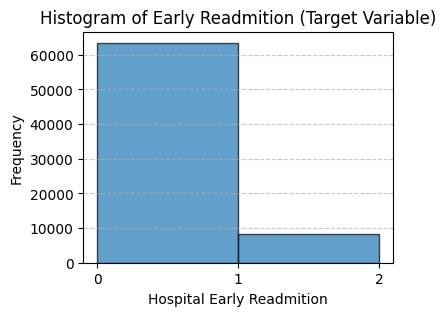

Number of 0s: 63487
Number of 1s: 8267
Percent of 0s: 0.8847869108342392
Percent of 1s: 0.1152130891657608


In [ ]:
# Deal with class imbalance
# Create a histogram of digit occurrences
plt.figure(figsize=(4,3))
bins = np.arange(3)
plt.hist(y_train, bins=bins, edgecolor='black', alpha=0.7)

plt.xticks(range(3))
plt.xlabel("Hospital Early Readmition")
plt.ylabel("Frequency")
plt.title("Histogram of Early Readmition (Target Variable)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Check the percentage of porportion that each has
num_zeros = (y_train == 0).sum()
num_ones = (y_train == 1).sum()
percent_zeros = num_zeros/(num_zeros+num_ones)
percent_ones = num_ones/(num_zeros+num_ones)

print(f"Number of 0s: {num_zeros}")
print(f"Number of 1s: {num_ones}")
print(f"Percent of 0s: {percent_zeros}")
print(f"Percent of 1s: {percent_ones}")

In [ ]:
# deal with class imbalance
categorical_features = [0, 1, 2, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                        24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]

# Initialize SMOTENC with a desired sampling strategy
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy=0.3, random_state=42)

# Apply SMOTENC to increase the minority class
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Initialize RandomUnderSampler to decrease the majority class
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# Apply RandomUnderSampler to balance the dataset
X_train_final, y_train_final = rus.fit_resample(X_train_resampled, y_train_resampled)


In [ ]:
print("Class distribution after SMOTE + Undersampling:")
print(np.bincount(y_train_final))

Class distribution after SMOTE + Undersampling:
[38092 19046]


In [ ]:
19046 / (19046  + 38092)

0.3333333333333333

### checking categorical and object columns for indices

In [ ]:
X_train.dtypes

,0
race,object
gender,object
age,object
time_in_hospital,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64
number_outpatient,int64
number_emergency,int64
number_inpatient,int64


In [ ]:
column_indice = pd.DataFrame(X_train.dtypes.index, index=np.arange(len(X_train.dtypes)))
column_indice

,0
0,race
1,gender
2,age
3,time_in_hospital
4,num_lab_procedures
5,num_procedures
6,num_medications
7,number_outpatient
8,number_emergency
9,number_inpatient


## Modeling (Random Forest & Ensemble)

In [ ]:
# Initialize the Random Forest model
categorical_cols = ['race', 'gender', 'age', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'admission_type', 'admission_sources',
       'discharge_dispositions', 'primary_diagnosis_1', 'primary_diagnosis_2',
       'primary_diagnosis_3'] # columns with str labels

# Apply Label Encoding to these columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_final[col] = le.fit_transform(X_train_final[col])
    X_test[col] = le.transform(X_test[col])  # Use the same encoder for test data
    label_encoders[col] = le  # Store encoders for later use


In [ ]:
# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
rf_model.fit(X_train_final, y_train_final)

# Predict and compute F2 Score
y_pred = rf_model.predict(X_test)
f2_score = fbeta_score(y_test, y_pred, beta=2)

print("F2 Score:", f2_score)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

F2 Score: 0.12130674993994715

Classification Report:
               precision    recall  f1-score   support

           0     0.8907    0.9451    0.9171     21162
           1     0.2068    0.1099    0.1436      2756

    accuracy                         0.8489     23918
   macro avg     0.5488    0.5275    0.5303     23918
weighted avg     0.8119    0.8489    0.8280     23918



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.datasets import load_iris

# Initialize ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
clf.fit(X_train_final, y_train_final)

# Predict
y_pred = clf.predict(X_test)

# Compute F2-score
f2_score = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2_score:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

F2 Score: 0.1151

Classification Report:
               precision    recall  f1-score   support

           0     0.8903    0.9476    0.9181     21162
           1     0.2050    0.1038    0.1378      2756

    accuracy                         0.8504     23918
   macro avg     0.5477    0.5257    0.5279     23918
weighted avg     0.8114    0.8504    0.8282     23918



In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.model_selection import train_test_split
import numpy as np

# Convert data to numpy arrays for RAPIDS
X_train_np = np.array(X_train_final)
y_train_np = np.array(y_train_final)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Initialize GPU-based Random Forest
rf_model = cuRF(n_estimators=1000, max_depth=10)

# Train the model on GPU
rf_model.fit(X_train_np, y_train_np)

# Predict
y_pred = rf_model.predict(X_train_np)


In [ ]:
import optuna
import numpy as np
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.metrics import fbeta_score

# Define the objective function for Optuna optimization
def objective(trial):
    # Search space for hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 500, 3000, step=500)
    max_depth = trial.suggest_int("max_depth", 5, 25, step=5)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])
    threshold = trial.suggest_float("threshold", 0.1, 0.9)

    # Train cuML GPU-based Random Forest
    rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
    rf_model.fit(X_train_np, y_train_np)

    # Predict probabilities
    y_proba = rf_model.predict_proba(X_test_np)[:, 1]  # Get probability for class 1

    # Apply threshold to classify
    y_pred = (y_proba >= threshold).astype(int)

    # Compute F2-score
    f2 = fbeta_score(y_test_np, y_pred, beta=2)

    return f2  # Optuna will maximize this

# Run the optimization
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=50)

# Print the best parameters
print("Best parameters:", study.best_params)


[I 2025-03-08 21:45:06,310] A new study created in memory with name: no-name-d755ddc9-8a76-4765-9a40-e33d869f0f5b
[I 2025-03-08 21:45:14,747] Trial 0 finished with value: 0.40958243762621327 and parameters: {'n_estimators': 2000, 'max_depth': 20, 'max_features': 'log2', 'threshold': 0.17301854842250997}. Best is trial 0 with value: 0.40958243762621327.
[I 2025-03-08 21:45:24,875] Trial 1 finished with value: 0.08865099941456887 and parameters: {'n_estimators': 3000, 'max_depth': 15, 'max_features': 'log2', 'threshold': 0.52405019693484}. Best is trial 0 with value: 0.40958243762621327.
[I 2025-03-08 21:45:26,385] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 500, 'max_depth': 10, 'max_features': 'log2', 'threshold': 0.7132215636971513}. Best is trial 0 with value: 0.40958243762621327.
[I 2025-03-08 21:45:32,387] Trial 3 finished with value: 0.3396709522771846 and parameters: {'n_estimators': 1500, 'max_depth': 20, 'max_features': 'sqrt', 'threshold': 0.3332701263893

Best parameters: {'n_estimators': 2500, 'max_depth': 15, 'max_features': 'sqrt', 'threshold': 0.20727806112842592}


Best GPU-based Random Forest Params:
``` python
{'n_estimators': 2500, 'max_depth': 15, 'max_features': 'sqrt', 'threshold': 0.20727806112842592}

```

**F2 Score: 0.413365726558924**

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import gp_minimize
from skopt.space import Integer, Categorical, Real
from sklearn.metrics import fbeta_score

# Define the search space
search_space = [
    Integer(500, 3000, name="n_estimators"),  # Number of trees
    Integer(5, 25, name="max_depth"),  # Tree depth
    Categorical(["sqrt", "log2"], name="max_features"),  # Feature selection
    Real(0.1, 0.9, name="threshold")  # Classification threshold
]

# Define the objective function
def objective(params):
    n_estimators, max_depth, max_features, threshold = params

    # Train cuML GPU-based Random Forest
    rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)
    rf_model.fit(X_train_np, y_train_np)

    # Predict probabilities
    y_proba = rf_model.predict_proba(X_test_np)[:, 1]  # Get probability for class 1

    # Apply threshold to classify
    y_pred = (y_proba >= threshold).astype(int)

    # Compute F2-score
    f2 = fbeta_score(y_test_np, y_pred, beta=2)

    return -f2  # Minimize the negative F2-score

# Run Bayesian Optimization
res = gp_minimize(objective, search_space, n_calls=50, random_state=42)

# Get best parameters
best_params = {
    "n_estimators": res.x[0],
    "max_depth": res.x[1],
    "max_features": res.x[2],
    "threshold": res.x[3]
}
print("Best cuRF Parameters:", best_params)


Best cuRF Parameters: {'n_estimators': 3000, 'max_depth': 16, 'max_features': 'sqrt', 'threshold': 0.20067005042623945}


**Parameters retrieved through bayesian optimization**
``` python
Best cuRF Parameters: {'n_estimators': 3000, 'max_depth': 16, 'max_features': 'sqrt', 'threshold': 0.20067005042623945}

```
F2-Score: 0.4135862742362952

In [ ]:
# FINAL MODEL
import numpy as np
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.metrics import fbeta_score

# Train a cuML GPU-based Random Forest
rf_model = cuRF(n_estimators=3000, max_depth=16, max_features='sqrt')
rf_model.fit(X_train_np, y_train_np)

# Get predicted probabilities for the positive class (class 1)
y_proba = rf_model.predict_proba(X_test_np)[:, 1]  # Extract probability for class 1

# Set your custom threshold (e.g., found via Optuna = study.best_params["threshold"])
#custom_threshold = best_params["threshold"]
custom_threshold = 0.20067005042623945

# Apply the threshold to convert probabilities to class labels
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate performance using the new threshold
f2_score = fbeta_score(y_test_np, y_pred_custom, beta=2)

print(f"F2-score with threshold {custom_threshold}: {f2_score}")

F2-score with threshold 0.20067005042623945: 0.4135862742362952


In [ ]:
print("\nClassification Report:\n", classification_report(y_test_np, y_pred_custom, digits=4))


Classification Report:
               precision    recall  f1-score   support

           0     0.9387    0.2780    0.4289     21162
           1     0.1344    0.8607    0.2325      2756

    accuracy                         0.3451     23918
   macro avg     0.5365    0.5693    0.3307     23918
weighted avg     0.8460    0.3451    0.4063     23918



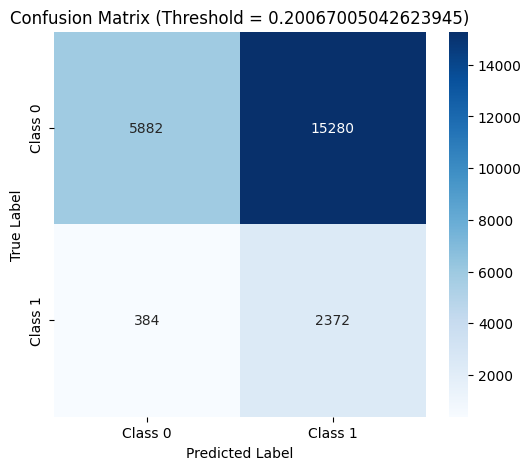

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_np, y_pred_custom)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.show()

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=1df4c25c78a53edc9ab182cc8b0570234ac7c6d1554e43b08819dbd426b832e4
  Stored in directory: /root/.cache/pip/wheels/ec/68/a9/de7d374ecb6f53462ce0eec8326fbab91b6228c82e67428d0d
Successfully built eli5


In [ ]:
import shap

# Use SHAP Explainer for cuML models
explainer = shap.Explainer(rf_model.predict, X_test_np)
shap_values = explainer(X_test_np)

# Plot feature importance
shap.summary_plot(shap_values, X_test_np)

PermutationExplainer explainer:   1%|          | 286/23918 [27:25<38:02:02,  5.79s/it]


KeyboardInterrupt: 

In [ ]:
# Initialize and train the model
rf_model_sk = RandomForestClassifier(n_estimators=3000, random_state=16, n_jobs=-1, max_features='sqrt')
rf_model_sk.fit(X_train_np, y_train_np)

# Get predicted probabilities for the positive class (class 1)
y_proba = rf_model_sk.predict_proba(X_test_np)[:, 1]  # Extract probability for class 1

# Set your custom threshold (e.g., found via Optuna = study.best_params["threshold"])
custom_threshold = best_params["threshold"]

# Apply the threshold to convert probabilities to class labels
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate performance using the new threshold
f2_score = fbeta_score(y_test_np, y_pred_custom, beta=2)

print("F2 Score:", f2_score)
print("\nClassification Report:\n", classification_report(y_test_np, y_pred_custom, digits=4))

F2 Score: 0.4095238095238095

Classification Report:
               precision    recall  f1-score   support

           0     0.9311    0.3593    0.5185     21162
           1     0.1392    0.7957    0.2370      2756

    accuracy                         0.4096     23918
   macro avg     0.5351    0.5775    0.3778     23918
weighted avg     0.8398    0.4096    0.4861     23918



array([2.33959576e-02, 2.27536913e-02, 5.94352642e-02, 7.66294419e-02,
       1.22219381e-01, 4.81913761e-02, 1.04384024e-01, 2.46225436e-02,
       1.86536399e-02, 4.87182498e-02, 4.95715216e-02, 2.06795090e-02,
       4.67293964e-03, 2.07298940e-03, 4.08737680e-04, 1.11287343e-02,
       9.76723531e-06, 1.77175880e-02, 1.71592694e-02, 1.39252044e-04,
       1.21286574e-02, 1.04580491e-02, 7.60952476e-04, 1.28487319e-04,
       5.52922283e-06, 1.91434280e-04, 3.90933353e-02, 2.18047149e-03,
       3.26548118e-05, 1.00225844e-05, 2.62777480e-06, 1.70140950e-02,
       1.55642228e-02, 1.74894426e-02, 2.63099760e-02, 2.42861688e-02,
       5.55138692e-02, 5.29322215e-02, 5.33339046e-02])

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install --quiet optuna

In [ ]:
# Continue to do threshold tuning for rf
# Convert data to NumPy for cuML
X_train_np = np.array(X_train_final)
y_train_np = np.array(y_train_final)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Train a cuML GPU-based Random Forest
rf_model = cuRF(n_estimators=1000, max_depth=15)
rf_model.fit(X_train_np, y_train_np)

# Get predicted probabilities
y_proba = rf_model.predict_proba(X_test_np)[:, 1]  # Get probability for class 1

# Define Optuna objective for threshold tuning
def objective(trial):
    threshold = trial.suggest_float("threshold", 0.1, 0.9)  # Search for the best threshold

    y_pred = (y_proba >= threshold).astype(int)  # Apply threshold
    f2 = fbeta_score(y_test_np, y_pred, beta=2)  # Compute F2-score

    return f2  # Optuna will maximize this score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)  # 50 trials for threshold tuning

# Print best threshold
print("Best threshold:", study.best_params["threshold"])


[I 2025-03-08 21:17:40,381] A new study created in memory with name: no-name-cf13653c-b609-400e-8a9d-44643312e8b5
[I 2025-03-08 21:17:40,388] Trial 0 finished with value: 0.0 and parameters: {'threshold': 0.7920523822310995}. Best is trial 0 with value: 0.0.
[I 2025-03-08 21:17:40,394] Trial 1 finished with value: 0.33525791165096136 and parameters: {'threshold': 0.344350625156706}. Best is trial 1 with value: 0.33525791165096136.
[I 2025-03-08 21:17:40,400] Trial 2 finished with value: 0.0 and parameters: {'threshold': 0.8812212484335469}. Best is trial 1 with value: 0.33525791165096136.
[I 2025-03-08 21:17:40,406] Trial 3 finished with value: 0.3980503655564582 and parameters: {'threshold': 0.10090798112268634}. Best is trial 3 with value: 0.3980503655564582.
[I 2025-03-08 21:17:40,412] Trial 4 finished with value: 0.36611647156781113 and parameters: {'threshold': 0.3094401261457519}. Best is trial 3 with value: 0.3980503655564582.
[I 2025-03-08 21:17:40,419] Trial 5 finished with va

Best threshold: 0.20313293349711123


In [ ]:
import numpy as np
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.metrics import fbeta_score

# Train a cuML GPU-based Random Forest
rf_model = cuRF(n_estimators=1000, max_depth=15)
rf_model.fit(X_train_np, y_train_np)

# Get predicted probabilities for the positive class (class 1)
y_proba = rf_model.predict_proba(X_test_np)[:, 1]  # Extract probability for class 1

# Set your custom threshold (e.g., found via Optuna = study.best_params["threshold"])
custom_threshold = study.best_params["threshold"]

# Apply the threshold to convert probabilities to class labels
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate performance using the new threshold
f2_score = fbeta_score(y_test_np, y_pred_custom, beta=2)

print(f"F2-score with threshold {custom_threshold}: {f2_score}")

F2-score with threshold 0.20313293349711123: 0.4125309093441995


In [ ]:
import optuna
import numpy as np
from cuml.ensemble import RandomForestClassifier as cuRF
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split

# Convert data to NumPy arrays for RAPIDS compatibility
X_train_np = np.array(X_train_final)
y_train_np = np.array(y_train_final)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Define objective function for Optuna
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 500, 3500, step=500)
    max_depth = trial.suggest_categorical("max_depth", [5, 10, 15, 20, 25])
    min_samples_split = trial.suggest_int("min_samples_split", 2, 15, step=3)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 8, step=2)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2"])

    # Train a GPU-based Random Forest
    rf_model = cuRF(
        n_estimators=n_estimators,
        max_depth=max_depth,
        max_features=max_features,
        split_criterion="gini",
    )
    rf_model.fit(X_train_np, y_train_np)

    # Predict and evaluate
    y_pred = rf_model.predict(X_test_np)
    f2_score = fbeta_score(y_test_np, y_pred, beta=2)

    return f2_score  # Optuna will maximize this score

# Run Optuna's Random Search for GPU-based Random Forest
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Run 50 random trials

# Print the best parameters
print("Best GPU-based Random Forest Params:", study.best_params)


[I 2025-03-08 21:08:43,781] A new study created in memory with name: no-name-4edae121-47f5-4270-a6bd-af8d4c0d8363
[I 2025-03-08 21:08:51,147] Trial 0 finished with value: 0.09576781532285045 and parameters: {'n_estimators': 2500, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.09576781532285045.
[I 2025-03-08 21:08:59,718] Trial 1 finished with value: 0.1191919191919192 and parameters: {'n_estimators': 2500, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 1 with value: 0.1191919191919192.
[I 2025-03-08 21:09:01,255] Trial 2 finished with value: 0.09643483343074226 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.1191919191919192.
[I 2025-03-08 21:09:15,528] Trial 3 finished with value: 0.11479385610347616 and parameters: {'n_estimators': 3000, 'max_depth'

Best GPU-based Random Forest Params: {'n_estimators': 3500, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


Best GPU-based Random Forest Params:
``` python
{'n_estimators': 3500, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

```

In [ ]:
# Convert data to numpy arrays for RAPIDS
X_train_np = np.array(X_train_final)
y_train_np = np.array(y_train_final)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)

# Initialize GPU-based Random Forest
rf_model = cuRF(n_estimators=3500,
                max_depth=15,
                min_samples_split=2,
                min_samples_leaf=3,
                max_features='sqrt')

# Train the model on GPU
rf_model.fit(X_train_np, y_train_np)

# Predict
y_pred = rf_model.predict(X_test_np)

f2_score = fbeta_score(y_test_np, y_pred, beta=2)

print("F2 Score:", f2_score)
print("\nClassification Report:\n", classification_report(y_test_np, y_pred, digits=4))

F2 Score: 0.12562814070351758

Classification Report:
               precision    recall  f1-score   support

           0     0.8911    0.9434    0.9165     21162
           1     0.2082    0.1143    0.1476      2756

    accuracy                         0.8479     23918
   macro avg     0.5496    0.5288    0.5320     23918
weighted avg     0.8124    0.8479    0.8279     23918



In [ ]:
# Tried to utilize GPU, thus not using sklearn CV methods since it is only compatible with CPU
# But below was the general idea that I was aiming for
# Hyperparameter Tuning using Random Search
rf_params = {
    "n_estimators": [500, 1000, 1500, 2000, 2500, 3000, 3500],
    "max_depth": [5, 10, 20, None, 15, 25],
    "min_samples_split": [2, 5, 8, 10, 15],
    "min_samples_leaf": [1, 2, 4, 5, 8],
    "max_features": ["sqrt", "log2"]
}

# f2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=1000, cv=3, scoring=f2_scorer, random_state=42, n_jobs=-1)

rf_random.fit(X_train_final, y_train_final)
print("Best Random Forest Params:", rf_random.best_params_)

KeyboardInterrupt: 